In [1]:
%reload_ext autoreload
%autoreload 2

import time
from tqdm import tqdm
import numpy as np
import scipy as sp
import torch
import torch.nn.functional as F
from torch import nn
from torchvision.transforms import v2 as transforms

from matplotlib import pyplot as plt

from networkAlignmentAnalysis.models.registry import get_model
from networkAlignmentAnalysis.datasets import get_dataset
from networkAlignmentAnalysis.experiments.registry import get_experiment
from networkAlignmentAnalysis import utils
from networkAlignmentAnalysis import files
from networkAlignmentAnalysis import train

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print('using device: ', DEVICE)

using device:  cuda


In [3]:
# TODO
# 1.1. include additional AlignmentModel methods stored in extra class in base model

# 4. Rewrite existing analysis pipelines
# 5. SLURM!!!!

# i don't like how by_stride is buried in the layers. Rewrite 

# Figure out why convolutional alignment measurement is slow...
# still working on if it's possible to speed up measure_alignment for convolutional layers

# Basic alignment_comparison Analyses (or maybe for alignment_stats):
# - compare initial to final alignment...
# - compare initial alignment to delta weight norm...
# - observe alignment of delta weight
# - compare alignment to outgoing delta weight norm!

# Eigenfeature analyses:
# done: - start by just looking at amplitude of activity on each eigenvector within each layer
# - Determine contribution of each eigenfeature on performance with a eigenvector dropout experiment
# - Measure beta_adversarial (figure out how adversarial examples map onto eigenvectors)

# alignmentShaping.ipynb has an adversarial experiment worth looking at

# Consider Valentin's idea about measuring an error threshold given signal and noise for a given level of alignment
# e.g. plot a 2d heatmap comparing the noise amplitude and the average alignment
# and then think about how to apply this to network design...

100%|██████████| 10/10 [00:03<00:00,  3.00it/s]
4it [00:50, 12.55s/it]


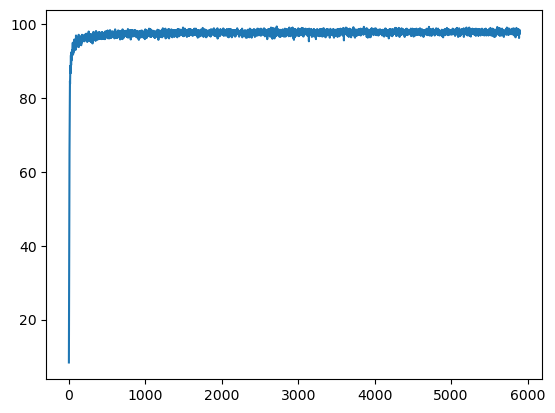

In [6]:
model_name = 'CNN2P2'
dataset_name = 'MNIST'
by_stride = True

net = get_model(model_name, build=True, dataset=dataset_name).to(DEVICE)
dataset = get_dataset(dataset_name, build=True, transform_parameters=net, device=DEVICE)

optimizer = torch.optim.Adam(net.parameters(), lr=1e-2)
results = train.train([net], [optimizer], dataset, num_epochs=100, alignment=False)

beta, eigenvalue, eigenvector = net.measure_eigenfeatures(dataset.test_loader, by_stride=by_stride)
# dropout_results = train.eigenvector_dropout([net], dataset, [eigenvalue], [eigenvector], train_set=False, by_stride=by_stride, by_layer=True)

plt.close('all')
plt.plot(results['accuracy'])
plt.show()

In [4]:
dropout_results = train.eigenvector_dropout([net], dataset, [eigenvalue], [eigenvector], train_set=False, by_stride=True, by_layer=True)

  0%|          | 0/10 [00:00<?, ?it/s]

from base --  [0]
from base: in the loop:  0 [0]
from base: in the loop:  1 [0]
from base: in the loop:  2 [0]
from base: in the loop:  3 [0]
from base --  [0]
from base: in the loop:  0 [0]
from base: in the loop:  1 [0]
from base: in the loop:  2 [0]
from base: in the loop:  3 [0]
from base --  [0]
from base: in the loop:  0 [0]
from base: in the loop:  1 [0]
from base: in the loop:  2 [0]
from base: in the loop:  3 [0]
from base --  [1]
from base: in the loop:  0 [1]
from base: in the loop:  1 [1]
from base: in the loop:  2 [1]
from base: in the loop:  3 [1]
from base --  [1]
from base: in the loop:  0 [1]
from base: in the loop:  1 [1]
from base: in the loop:  2 [1]
from base: in the loop:  3 [1]
from base --  [1]
from base: in the loop:  0 [1]
from base: in the loop:  1 [1]
from base: in the loop:  2 [1]
from base: in the loop:  3 [1]
from base --  [2]
from base: in the loop:  0 [2]
from base: in the loop:  1 [2]
from base: in the loop:  2 [2]
from base: in the loop:  3 [2]
from b

  0%|          | 0/10 [00:02<?, ?it/s]


KeyboardInterrupt: 

In [3]:
# next steps:
# - finish eigenvector dropout methods -- need to do some linear algebra and decide how to renormalize
# - integrate into alignment_stats and observe results!!!
# --
# I'd like to make the conv handling code a bit smarter!
# And also more readable...
# Move some of the conv layer handling methods to internal AlignmentNetwork methods...
# Then integrate those methods into the 3 eigenfeature methods for easy reading and clear code
# --

In [ ]:
# places that use 'unfold' or should use it
# -- done -- AN.get_alignment_weights()
# -- done --AN.forward_eigenvector.dropout() # --- doesn't use it but it should!!! --- 
# -- done -- AN.measure_eigenfeatures()
# AN.measure_class_eigenfeatures()